In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

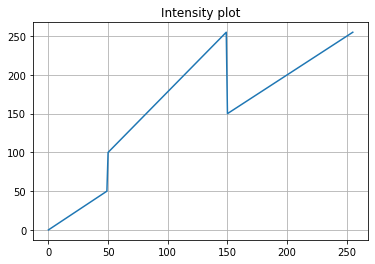

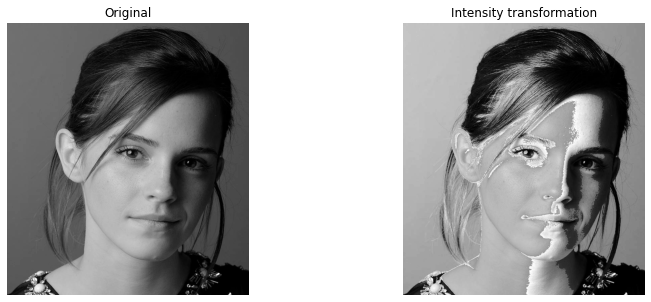

In [49]:
a1 = np.linspace(0,50,50)
a2 = np.linspace(100,255,100)
a3 = np.linspace(150,255,106)

plt.figure() 
intensity = np.concatenate((a1,a2,a3),axis=0)
plt.plot(intensity)
plt.title('Intensity plot')
plt.grid()

img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\emma_gray.jpg', cv.IMREAD_GRAYSCALE)
g = cv.LUT(img,intensity)

fig, ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Intensity transformation')
ax[1].axis('off')

plt.show()


(-0.5, 180.5, 216.5, -0.5)

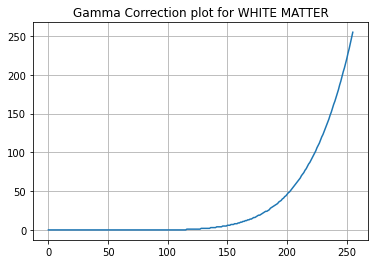

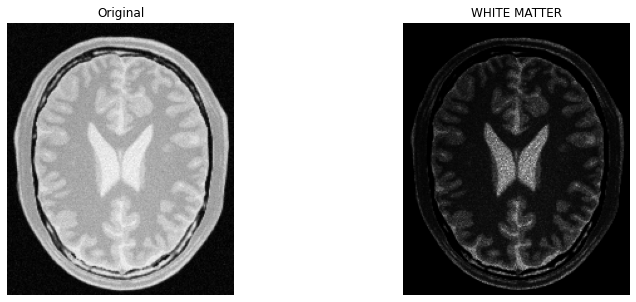

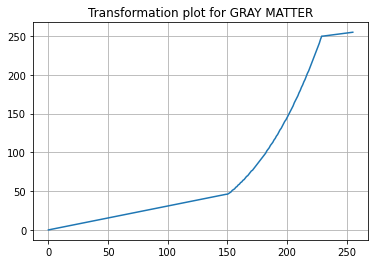

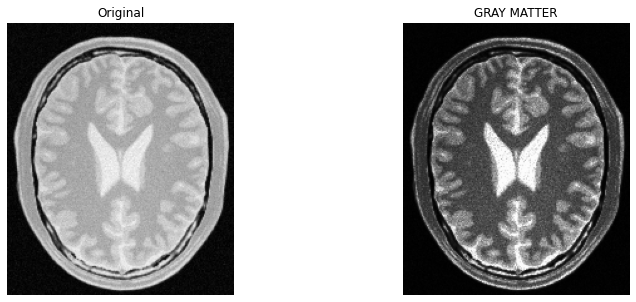

In [106]:
img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# white matter
gamma = 7
plt.figure()
t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
plt.plot(t)
plt.title('Gamma Correction plot for WHITE MATTER')
plt.grid()

g = cv.LUT(img,t)
fig, ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('WHITE MATTER')
ax[1].axis('off')

# gray matter
gamma = 4
plt.figure()
t1 = np.array([(p/230)**gamma*255 for p in range(150,230)]).astype(np.uint8)
t0 = np.linspace(0,min(t1),150)
t2 = np.linspace(max(t1),255,26)
t_ = np.concatenate((t0, t1, t2),axis=0)
plt.plot(t_)
plt.title('Transformation plot for GRAY MATTER')
plt.grid()


g = cv.LUT(img,t_)

fig, ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('GRAY MATTER')
ax[1].axis('off')

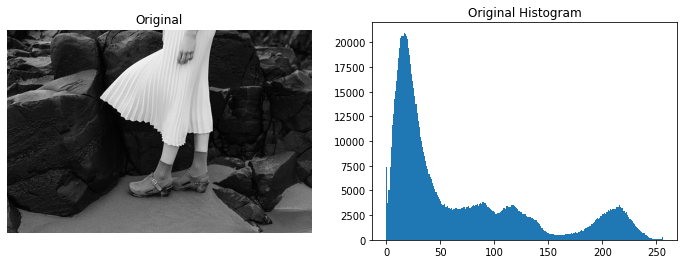

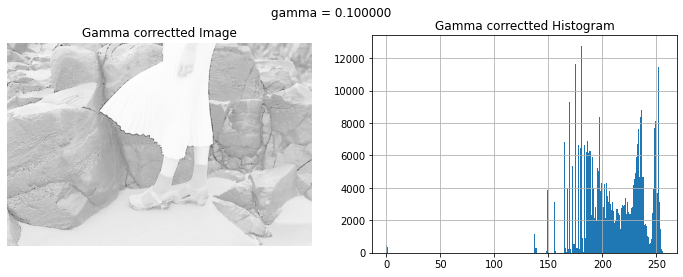

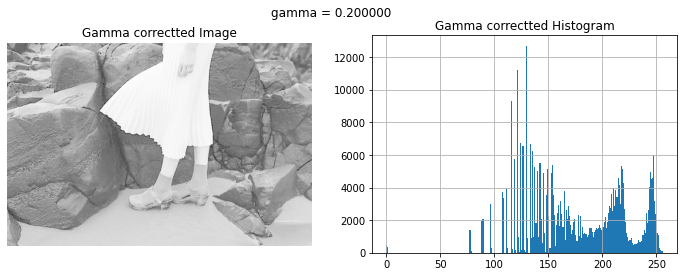

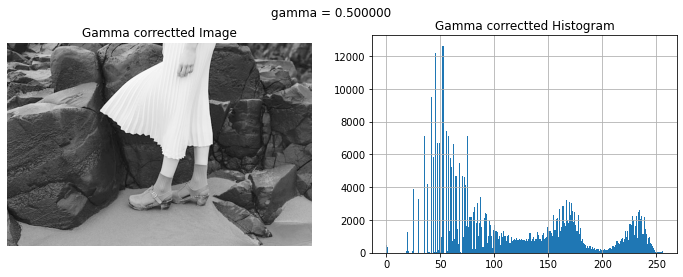

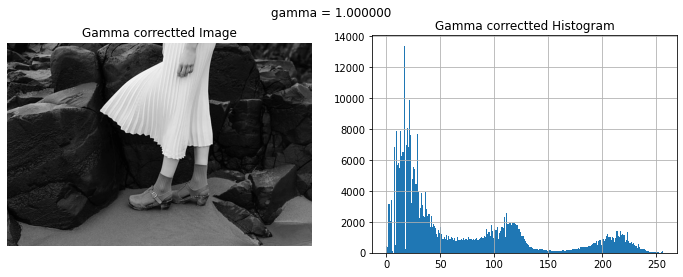

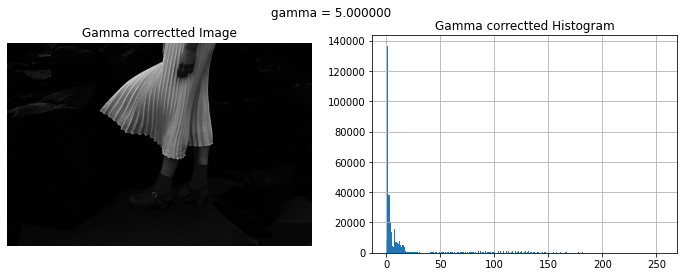

In [43]:
img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\highlights_and_shadows.jpg')
gammas = [0.1, 0.2, 0.5, 1, 5]
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2GRAY),cmap='gray',vmin=0,vmax=255 )
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].hist(img.flatten(), 256, [0,256])
ax[1].set_title("Original Histogram")

for n,gamma in enumerate(gammas,1):
    lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
    t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
    lab[:,:,0] = cv.LUT(lab[:,:,0],t)
    lab = cv.cvtColor(lab, cv.COLOR_Lab2BGR)

    fig, ax = plt.subplots(1,2, figsize = (12,4))

    plt.suptitle("gamma = %f" % (gamma))
    lab_gray = cv.cvtColor(lab,cv.COLOR_BGR2GRAY)
    ax[0].imshow(lab_gray,cmap='gray',vmin=0,vmax=255 )
    ax[0].set_title("Gamma correctted Image")
    ax[0].axis('off')

    ax[1].hist(lab_gray.flatten(), 256, [0,256])
    ax[1].set_title("Gamma correctted Histogram")
    ax[1].grid()

plt.show()


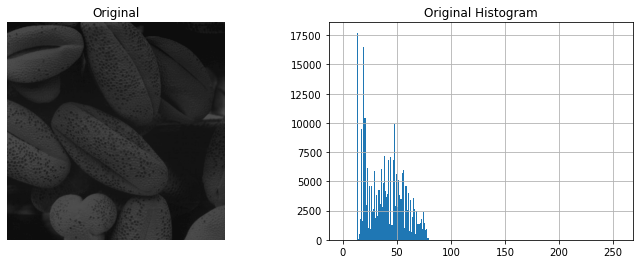

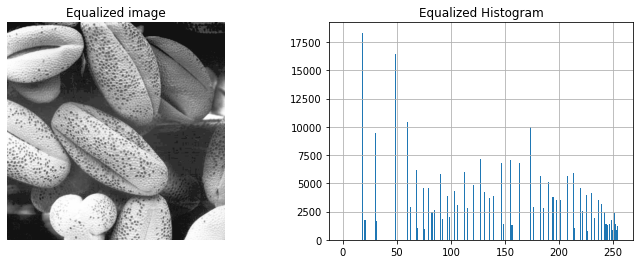

In [45]:
def histEqualize(im):
    hist = cv.calcHist([im], [0], None, [256], [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * ((len(hist)-1)/cdf.max())
    t = cdf_normalized.astype(int)
    equalized = cv.LUT(im, t)
    return equalized

img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\shells.png', cv.IMREAD_GRAYSCALE)


fig, ax = plt.subplots(1,2, figsize = (12,4))
# hist_img = cv.calcHist([img], [0], None, [256], [0,256])
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Original")
ax[0].axis('off')
ax[1].hist(img.flatten(), 256, [0,256])
ax[1].set_title("Original Histogram")
ax[1].grid()
# eq = cv.equalizeHist(img)

# hist_eq = cv.calcHist([eq],[0], None, [256], [0,256])
equalized_img = histEqualize(img)
fig, ax = plt.subplots(1,2, figsize = (12,4))
# hist_img = cv.calcHist([equalized_img], [0], None, [256], [0,256])
ax[0].imshow(equalized_img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Equalized image")
ax[0].axis('off')
ax[1].hist(equalized_img.flatten(), 256, [0, 256])
ax[1].set_title("Equalized Histogram")
ax[1].grid()

plt.show()

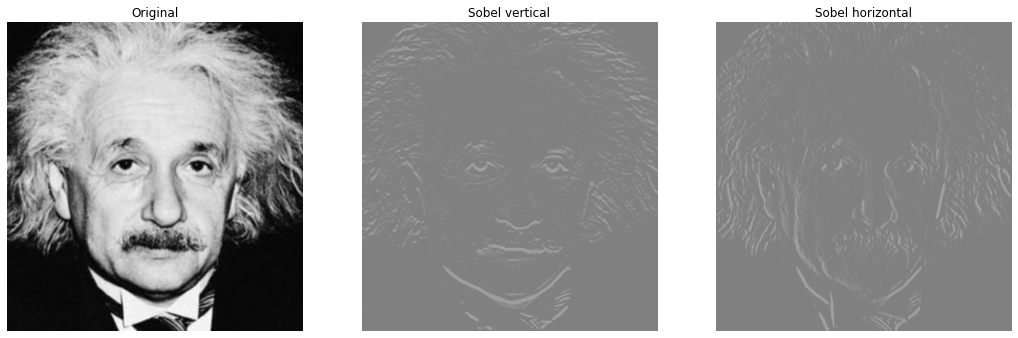

In [110]:
img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\einstein.png', cv.IMREAD_GRAYSCALE)

# Sobel vertical
kernal_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype='float')
imgv = cv.filter2D(img, -1, kernal_v)

# Sobel horizontal
kernal_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype='float')
imgh = cv.filter2D(img, -1, kernal_h)

fig, ax = plt.subplots(1, 3, figsize=(18,18))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=256)
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(imgv, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("Sobel vertical")
ax[1].axis('off')

ax[2].imshow(imgh, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title("Sobel horizontal")
ax[2].axis('off')

plt.show()



def sobelFilter(dir, im):
    if dir=='v':
        kernal = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype='float')
    elif dir == 'h':
        kernal = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype='float')
    


